# Random Forest Classification Examples

Will utilize the **RandomForest** from **RandomForest.py** to classify a set of training data.

See specifics on the random forest code here: https://github.com/dadler6/RF/blob/master/src/RandomForest.py

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.insert(0, '../src')

In [15]:
from RandomForest import *

In [4]:
%matplotlib inline

## Example 1: Iris Dataset

A first simple test will utilize the Iris dataset, which is inlcuded [sklearn library]([sklearn library](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [5]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

In [7]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.get_dummies(iris.target)
y.columns = iris.target_names

In [8]:
print("Number of training samples: " + str(X.shape[0]))
print("Setosa breakdown (y,n): (" + str(y['setosa'].sum()) + ',' + str(len(y) - y['setosa'].sum()) + ')')
print("Setosa breakdown (y,n): (" + str(y['setosa'].sum()) + ',' + str(len(y) - y['setosa'].sum()) + ')')
print("Versicolor breakdown (y,n): (" + str(y['versicolor'].sum()) + ',' + str(len(y) - y['versicolor'].sum()) + ')')
print("Virginica breakdown (y,n): (" + str(y['virginica'].sum()) + ',' + str(len(y) - y['virginica'].sum()) + ')')

Number of training samples: 150
Setosa breakdown (y,n): (50,100)
Setosa breakdown (y,n): (50,100)
Versicolor breakdown (y,n): (50,100)
Virginica breakdown (y,n): (50,100)


### Simple EDA and Data Cleaning

Since this is a random forest, which should try to take care of overfitting, I will not worry too much about feature design, etc.

In [11]:
# Check to see if there are null values in X
print(pd.isnull(X).sum())
print()

# Check to see if there are null values in y
print(pd.isnull(y).sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

setosa        0
versicolor    0
virginica     0
dtype: int64


#### Get a basic test/train split

Will utilize a train=0.67, test=0.33 split.

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

### Data fitting

Will fit a random forest model to each of the flower types:
* setosa
* versicolor
* virginica

Will simply utilize a random forest that does a pure fit (each leaf node must be pure), and look at the out of back error (oob) for each of these.

In [44]:
# Intialize each Random Forest
rf_setosa = RandomForest(terminate='pure', oob=True)
rf_versicolor = RandomForest(terminate='pure', oob=True)
rf_virginica = RandomForest(terminate='pure', oob=True)

# Fit each random forest
rf_setosa.fit(X_train, y_train['setosa'])
rf_versicolor.fit(X_train, y_train['versicolor'])
rf_virginica.fit(X_train, y_train['virginica'])

# Oob
print('Setosa OOB Error: ' + str(rf_setosa.get_oob_error()))
print('Versicolor OOB Error: ' + str(rf_versicolor.get_oob_error()))
print('Virginica OOB Error: ' + str(rf_virginica.get_oob_error()))

# Predict the train set
y_setosa_pred = rf_setosa.predict(X_test)
y_versicolor_pred = rf_versicolor.predict(X_test)
y_virginica_pred = rf_virginica.predict(X_test)

Setosa OOB Error: 0.0
Versicolor OOB Error: 0.00197030075104
Virginica OOB Error: 0.00248481683326


Now, I will look at the error for each random forest prediction using a confusion matrix.

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_setosa_pred

array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

In [25]:
confusion_setosa = confusion_matrix(y_test['setosa'], y_setosa_pred)
confusion_versicolor = confusion_matrix(y_test['versicolor'], y_versicolor_pred)
confusion_virginica = confusion_matrix(y_test['virginica'], y_virginica_pred)

print('Setosa Confusion')
print(confusion_setosa)
print()

print('Versicolor Confusion')
print(confusion_versicolor)
print()

print('Virginica Confusion')
print(confusion_virginica)
print()

Setosa Confusion
[[31  0]
 [ 0 19]]

Versicolor Confusion
[[34  1]
 [ 0 15]]

Virginica Confusion
[[34  0]
 [ 1 15]]



There is one data point, as there was on the previous DT example, that is being missclassified as Versicolor, when it should be Virginica.

See this datapoint on this link:
https://github.com/dadler6/RF/blob/master/examples/DecisionTreeClassification_Examples.ipynb

### Look at one dimensional form of test data

I am going to look at the one-dimensional form of test data to see which parameter produces the most differentiation within this example.

In [35]:
# Put the target data with X to be able to look at each axis
X_train_w_target = X_train.copy()
X_train_w_target['Flower'] = iris.target[X_train_w_target.index.values]
X_train_w_target.Flower = X_train_w_target.Flower.map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

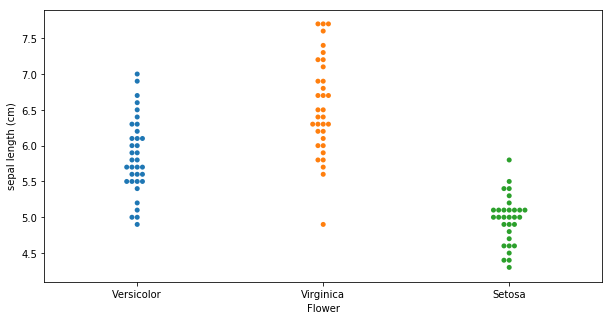

In [37]:
# Look at the
fig = plt.figure(figsize=(10, 5))
sns.swarmplot(x='Flower', y='sepal length (cm)', data=X_train_w_target)

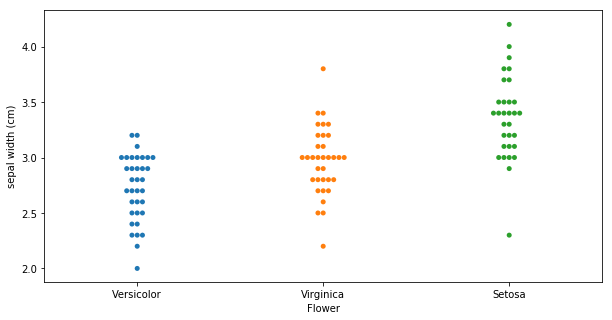

In [39]:
# Look at the
fig = plt.figure(figsize=(10, 5))
sns.swarmplot(x='Flower', y='sepal width (cm)', data=X_train_w_target)

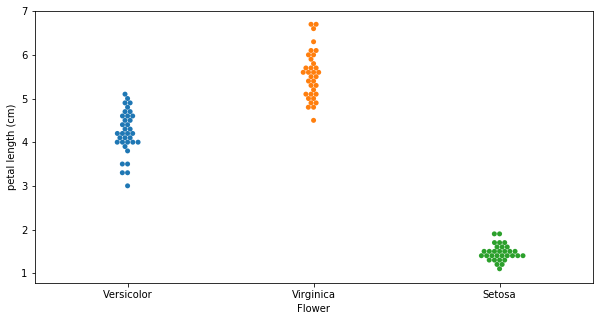

In [41]:
# Look at the
fig = plt.figure(figsize=(10, 5))
sns.swarmplot(x='Flower', y='petal length (cm)', data=X_train_w_target)

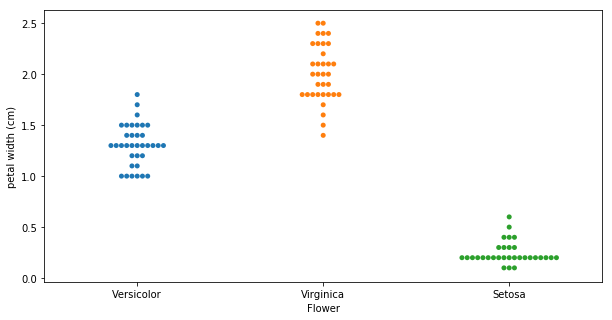

In [42]:
# Look at the
fig = plt.figure(figsize=(10, 5))
sns.swarmplot(x='Flower', y='petal width (cm)', data=X_train_w_target)

### Adjust trees

Since there are a low amount of training examples to begin with, I am going to change the following:

* Increase the sample size though within each tree from the default of 0.5 -> 0.75
* Increase the number of trees from 10 -> 20

In [65]:
# Intialize each Random Forest
rf_setosa_2 = RandomForest(samp_size=0.9, terminate='leaf', leaf_terminate=1, num_trees=20, oob=True)
rf_versicolor_2 = RandomForest(samp_size=0.9, terminate='leaf', leaf_terminate=1, num_trees=20, oob=True)
rf_virginica_2 = RandomForest(samp_size=0.9, terminate='leaf', leaf_terminate=1, num_trees=20, oob=True)

# Fit each random forest
rf_setosa_2.fit(X_train, y_train['setosa'])
rf_versicolor_2.fit(X_train, y_train['versicolor'])
rf_virginica_2.fit(X_train, y_train['virginica'])

# Oob
print('Setosa OOB Error: ' + str(rf_setosa_2.get_oob_error()))
print('Versicolor OOB Error: ' + str(rf_versicolor_2.get_oob_error()))
print('Virginica OOB Error: ' + str(rf_virginica_2.get_oob_error()))

Setosa OOB Error: 0.0
Versicolor OOB Error: 0.00303059018263
Virginica OOB Error: 0.00214250164832


It appears the original RFs were the best match for this, and likely the oob is just an outlier value.

## Example 2: Titanic data

This data is based upon the (Kaggle Titanic Competition)[https://www.kaggle.com/c/titanic].  I had previously cleaned the data in this notebook:

https://github.com/dadler6/kaggle_titanic/blob/master/notebooks/Cleaning_and_EDA.ipynb

and then implemented an sklearn RF Classifier in this notebook:

https://github.com/dadler6/kaggle_titanic/blob/master/notebooks/RF_Classifier.ipynb

You can find the cleaned data within this folder:

https://github.com/dadler6/RF/tree/master/data

In [113]:
train = pd.read_csv('../data/train_cleaned_v2_02110218.csv')
test = pd.read_csv('../data/test_cleaned_v1_05302018.csv')

### Brief EDA

In [71]:
# Separate out the columns for input -> target
cols_train = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_S']
cols_target = ['Survived']

In [74]:
# Groupby and just look at mean value of each variable separated by survived/not survived
train.groupby(cols_target, as_index=False)[cols_train].mean()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,0,2.560297,0.853432,30.14564,0.552876,0.309833,18.768458,0.131725,0.781076
1,1,2.035032,0.334395,27.93551,0.458599,0.445860,32.990500,0.251592,0.646497


It appears that the following columns have the greatest impact on survival:

* Sex
* Fare
* Embarked_C

In [80]:
# Grab the data
X_titanic = train[cols_train].copy()
y_titanic = train['Survived'].copy()

### Train data

Will use the number of features as sqrt(total features)

In [83]:
# Initialize RF
rf_titanic = RandomForest(num_features=int(np.sqrt(X_titanic.shape[1])), terminate='pure', oob=True)

# Fit
rf_titanic.fit(X_titanic, y_titanic)

# Print oob
print('OOB Error: ' + str(rf_titanic.get_oob_error()))

OOB Error: 0.0295598491497


Look at how the data is being predicted:

In [86]:
# Predict on the training data
y_pred = rf_titanic.predict(X_titanic)

# Confusion matrix
C = confusion_matrix(y_titanic, y_pred)
# Normalize
C = C / C.astype(float).sum().sum()

# Print
print(C)

[[ 0.63071512  0.00117233]
 [ 0.24384525  0.12426729]]


There is a HUGE false negative rate.  This typically means that the data is being underfit. I will increase the number of samples per model, and decrease the number of trees.

In [97]:
# Initialize RF
rf_titanic = RandomForest(
    samp_size=0.85, 
    num_trees=5, 
    num_features=int(np.sqrt(X_titanic.shape[1])), 
    terminate='pure', 
    oob=True
)

# Fit
rf_titanic.fit(X_titanic, y_titanic)

# Print oob
print('OOB Error: ' + str(rf_titanic.get_oob_error()))

OOB Error: 0.00518360670465


In [100]:
# Predict on the training data
y_pred = rf_titanic.predict(X_titanic)

# Confusion matrix
C = confusion_matrix(y_titanic, y_pred)
# Normalize
C = C / C.astype(float).sum().sum()

# Print
print(C)

[[ 0.58147714  0.05041032]
 [ 0.15826495  0.2098476 ]]


Save this random forest

In [107]:
import pickle

with open('../data/rf_titanic_v1_05302018.pkl', 'wb') as output:
    pickle.dump(rf_titanic, output, pickle.HIGHEST_PROTOCOL)

### Predict test data

Now I will predict on the actual data and save.

In [116]:
y_pred_test = rf_titanic.predict(test[cols_train])

In [122]:
y_test_df = pd.DataFrame({
    'PassengerId': test.PassengerId.values,
    'Survived': y_pred_test
})

In [126]:
y_test_df['PassengerId'] = y_test_df['PassengerId'].astype(int)
y_test_df['Survived'] = y_test_df['Survived'].astype(int)

In [128]:
y_test_df.to_csv('../data/y_test_titanic_v1_05302018.csv', index=False)

In [129]:
y_test_df.Survived.mean()

0.30861244019138756

## More changes to the data

The data was submitted on Kaggle and received a 0.73205 prediction rate.

Will now make a test set to really look at accuracy.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(
    train[cols_train], train['Survived'], test_size=0.25, random_state=42
)

In [139]:
# Initialize RF
rf_titanic = RandomForest(
    samp_size=0.85, 
    num_trees=5, 
    num_features=int(np.sqrt(X_titanic.shape[1])), 
    terminate='pure', 
    oob=True
)

# Fit
rf_titanic.fit(X_train, y_train)

# Print oob
print('OOB Error: ' + str(rf_titanic.get_oob_error()))
print()

# Get confusion matrix stats
# Predict on the training data
y_pred = rf_titanic.predict(X_test)

# Accuracy
C = confusion_matrix(y_test, y_pred)
# Normalize
C = C / C.astype(float).sum().sum()

# Print
print('TP: ' + str(C[0, 0]))
print('FP: ' + str(C[0, 1]))
print('FN: ' + str(C[1, 0]))
print('TN: ' + str(C[1, 1]))
print()

# Accuraxy
print('Accuracy: ' + str(C[0, 0] + C[1, 1]))

OOB Error: 0.00948574561524

TP: 0.546728971963
FP: 0.11214953271
FN: 0.182242990654
TN: 0.158878504673

Accuracy: 0.705607476636


Since there is a high FN rate, will try to balance classes by taking a random sample of the smaller class (survived) and duplicating it.

In [148]:
# Get the amount of rows to sample
total_not_survived = len(y_train.loc[y_train == 0])
amount_to_sample = total_not_survived - len(y_train.loc[y_train == 1])

print('Will sample: ' + str(amount_to_sample) + ' rows.')
print()

# Sample that amount of rows in the dataset
samp_index = np.random.choice(y_train[y_train == 1].index.values, size=amount_to_sample, replace=True)

# Contenate
y_new = y_train.loc[samp_index]
X_new = X_train.loc[samp_index, :]

X_train_balance = pd.concat([X_train, X_new])
y_train_balance = pd.concat([y_train, y_new])

# Print the new class balance
print('Class sizes:')
print(y_train_balance.value_counts(normalize=True))

Will sample: 157 rows.

Class sizes:
1    0.5
0    0.5
Name: Survived, dtype: float64


Fit a model

In [149]:
# Initialize RF
rf_titanic_balanced = RandomForest(
    samp_size=0.85, 
    num_trees=5, 
    num_features=int(np.sqrt(X_titanic.shape[1])), 
    terminate='pure', 
    oob=True
)

# Fit
rf_titanic_balanced.fit(X_train_balance, y_train_balance)

# Print oob
print('OOB Error: ' + str(rf_titanic_balanced.get_oob_error()))
print()

# Get confusion matrix stats
# Predict on the training data
y_pred = rf_titanic_balanced.predict(X_test)

# Accuracy
C = confusion_matrix(y_test, y_pred)
# Normalize
C = C / C.astype(float).sum().sum()

# Print
print('TP: ' + str(C[0, 0]))
print('FP: ' + str(C[0, 1]))
print('FN: ' + str(C[1, 0]))
print('TN: ' + str(C[1, 1]))
print()

# Accuraxy
print('Accuracy: ' + str(C[0, 0] + C[1, 1]))

OOB Error: 0.0126484744539

TP: 0.495327102804
FP: 0.163551401869
FN: 0.130841121495
TN: 0.210280373832

Accuracy: 0.705607476636


FN dropped by 5% which is good, but the FP went up.  Will now try to drop the sample size and increase the number of trees to decrease overfitting.

In [168]:
# Initialize RF
rf_titanic_balanced_2 = RandomForest(
    samp_size=0.5, 
    num_trees=30, 
    terminate='leaf', 
    leaf_terminate=10,
    oob=True
)

# Fit
rf_titanic_balanced_2.fit(X_train_balance, y_train_balance)

# Print oob
print('OOB Error: ' + str(rf_titanic_balanced_2.get_oob_error()))
print()

# Get confusion matrix stats
# Predict on the training data
y_pred = rf_titanic_balanced_2.predict(X_test)

# Accuracy
C = confusion_matrix(y_test, y_pred)
# Normalize
C = C / C.astype(float).sum().sum()

# Print
print('TP: ' + str(C[0, 0]))
print('FP: ' + str(C[0, 1]))
print('FN: ' + str(C[1, 0]))
print('TN: ' + str(C[1, 1]))
print()

# Accuraxy
print('Accuracy: ' + str(C[0, 0] + C[1, 1]))

OOB Error: 0.00114444659939

TP: 0.542056074766
FP: 0.116822429907
FN: 0.0934579439252
TN: 0.247663551402

Accuracy: 0.789719626168


Save this tree due to 10% or so improvement (FP rate is still high).

In [169]:
import pickle

with open('../data/rf_titanic_v2_05302018.pkl', 'wb') as output:
    pickle.dump(rf_titanic_balanced_2, output, pickle.HIGHEST_PROTOCOL)

In [170]:
y_pred_test_2 = rf_titanic_balanced_2.predict(test[cols_train])

In [172]:
y_test_df_2 = pd.DataFrame({
    'PassengerId': test.PassengerId.values,
    'Survived': y_pred_test_2
})

y_test_df_2['PassengerId'] = y_test_df_2['PassengerId'].astype(int)
y_test_df_2['Survived'] = y_test_df_2['Survived'].astype(int)

In [173]:
y_test_df_2.to_csv('../data/y_test_titanic_v2_05302018.csv', index=False)